# 1.0 Clustering

## 1.1 Introdução



*Clustering* é uma ferramenta poderosa de explorar dados desconhecidos e encontrar padrões. O aprendizado não supervisionado é muito comumente usado com grandes conjuntos de dados, onde não é trivial começar com o aprendizado de máquina supervisionado. Em geral, é uma boa ideia tentar o aprendizado não supervisionado para explorar um conjunto de dados antes de tentar usar modelos de aprendizado de máquina de aprendizado supervisionado.

Algoritmos de clusterização agrupam linhas semelhantes, formando clusters. Quando olhamos para os clusters, podemos começar a entender melhor a estrutura dos dados.

Neste projeto, realizaremos o agrupamento de jogadores de futebol que participaram do Campeonato Brasileiro de 2017, tendo como base os dados do CartolaFC. Iremos analisar os jogadores da posição Meia, com relação aos indicadores de performance Roubadas de Bola e Pontuação. 

## 1.2 O Dataset

O dataset a ser utilizado (**dados_agregados_amostras.csv)** é oriundo da API do Cartola FC, que está disponível em https://github.com/henriquepgomide/caRtola.

O Cartola FC é um jogo virtual vinculado à emissora de televisão Rede Globo, e que simula para seus jogadores – denominados internamente 
de cartoleiros – a possibilidade de escalação de uma equipe de futebol a cada uma das 38 rodadas da série A do Campeonato Brasileiro. 

 Vale ressaltar que,  apesar  de  ser  um  jogo  fantasia,  todos  os atletas  e  técnicos  passíveis  de  escalação  são  os mesmos  que  participam  do  Campeonato Brasileiro de Futebol. 

Este dataset  tem todos os dados, de um período de quatro anos (2014 - 2017), de todas as rodadas do Brasileirão, e de todos os jogadores. Cada linha representa os scouts (indicadores de performance) de um jogador para uma determinada rodada de um certo ano. Este dataset já está limpo e sem inconsistência de dados.

Colunas Relevantes da Tabela:

- **Rodada** -- Número da rodada do Brasileirão.
- **ClubeID** - Clube do jogador
- **AtletaID** -- Id do jogador.
- **Posicao** - Posição do jogador.
- **Jogos** - Quantidade de jogos que o jogador participou.
- **Pontos** - Pontuação do jogador.
- **Preco** - Preço do jogador.
- **FS** - Faltas cometidas.
- **PE** - Passes errados.
- **A** - Assistências.
- **FT** - Finalizações na trave.
- **FD** - Finalizações definidas.
- **FF** - Finalizações para fora.
- **G** - Gols.
- **I** - Impedimentos.
- **PP** - Pênaltis perdidos.
- **RB** - Roubadas de bola.
- **FC** - Faltas Cometidas.
- **GC** - Gols contra.
- **CA** - Cartões amarelo.
- **CV** - Cartões vermelho.
- **SG** - Jogos sem sofrer gol
- **DD** - Defesas difíceis.
- **DP** - Defesas de pênalti
- **GS** - Gols sofridos.




In [46]:

#Vamos dar uma olhada nos dados...
import pandas as pd
pd.set_option('display.max_columns', 72)
rodadas = pd.read_csv("dados_agregados_amostras.csv", low_memory=False)
rodadas.head(10)



,A,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,home.attack,home.defend,home.score.x,pred.away.score,pred.home.score,risk_points,variable
0,0.0,36540,1.0,0.0,16,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.00,2,12.88,-2.12,0.0,1,1.0,2014,0.000000,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,1.000000,0.000000,1.0,0.500000,1.0,1.00,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1
1,0.0,36540,0.0,0.0,16,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,3.4,2.70,2,12.04,-0.84,2.0,2,0.0,2014,0.000000,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.333333,1.0,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.0,1.0,1.800000,0.666667,1.0,0.333333,1.0,1.00,2.0,0.0,0.0,2.0,0.0,0.0,1.000000,2
2,0.0,36540,1.0,0.0,16,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.1,1.83,2,10.85,-1.19,1.0,3,0.0,2014,0.000000,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.250000,1.0,0.250000,1.0,1.250000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.0,1.0,1.375000,0.750000,1.0,0.250000,1.0,1.00,1.0,0.0,0.0,2.0,0.0,0.0,1.000000,1
3,0.0,36540,0.0,0.0,16,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.9,1.60,2,10.61,-0.24,0.0,4,0.0,2014,0.000000,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,1.200000,1.2,0.400000,0.4,0.200000,0.2,1.200000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600000,1.6,0.0,0.0,1.280000,0.600000,0.6,0.200000,0.2,1.28,1.0,0.0,0.0,2.0,0.0,0.0,1.000000,1
4,0.0,36540,1.0,0.0,16,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.2,1.52,2,10.45,-0.16,0.0,5,1.0,2014,0.000000,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,1.833333,2.2,0.333333,0.4,0.333333,0.4,1.000000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,1.6,0.0,0.0,1.266667,0.500000,0.6,0.333333,0.4,1.52,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2
5,0.0,36540,0.0,0.0,16,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.9,1.58,2,10.14,-0.31,0.0,7,0.0,2014,0.000000,0.0,0.375000,0.0,0.0,0.0,0.0,0.0,1.375000,1.4,0.250000,0.2,0.500000,0.6,0.875000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.8,0.0,0.0,1.187500,0.375000,0.2,0.250000,0.2,0.82,3.0,0.0,0.0,1.0,0.0,0.0,1.000000,1
6,0.0,36540,0.0,0.0,16,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,10.7,2.88,2,11.87,1.73,3.0,8,1.0,2014,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,1.333333,1.2,0.222222,0.2,0.555556,0.8,1.000000,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111,0.8,0.0,0.0,2.244444,0.666667,0.6,0.333333,0.4,2.94,0.0,0.0,0.0,2.0,0.0,0.0,1.000000,1
7,0.0,36540,0.0,0.0,16,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,4.1,3.03,2,11.20,-0.67,2.0,9,0.0,2014,0.000000,0.0,0.300000,0.0,0.0,0.0,0.0,0.0,1.300000,1.4,0.300000,0.2,0.500000,0.8,1.000000,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.100000,0.6,0.0,0.0,2.430000,0.800000,1.0,0.300000,0.4,3.58,1.0,0.0,0.0,1.0,0.0,0.0,3.226298,2
8,0.0,36540,0.0,0.0,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.4,2.74,2,10.70,-0.50,0.0,10,0.0,2014,0.000000,0.0,0.272727,0.0,0.0,0.0,0.0,0.0,1.181818,0.4,0.272727,0.2,0.545455,0.8,0.909091,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.090909,0.8,0.0,0.0,2.245455,0.727273,1.0,0.272727,0.2,3.42,1.0,0.0,0.0,2.0,0.0,0.0,3.195153,2
9,1.0,36540,0.0,0.0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0,3.47,2,12.69,1.99,0.0,11,1.0,2014,0.083333,0.2,0.250000,0.0,0.0,0.0,0.0,0.0,1.083333,0.4,0.250000,0.2,0.500000,0.8,0.833333,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.8,0.0,0.0,2.891667,0.666667,1.0,0.333333,0.4,5.42,0.0,

In [0]:
#Dimensão do dataset
rodadas.shape

(17567, 72)

In [0]:
#Tipo dos dados
rodadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17567 entries, 0 to 17566
Data columns (total 72 columns):
A                  17567 non-null float64
AtletaID           17567 non-null int64
CA                 17567 non-null float64
CV                 17567 non-null float64
ClubeID            17567 non-null int64
DD                 17567 non-null float64
DP                 17567 non-null float64
FC                 17567 non-null float64
FD                 17567 non-null float64
FF                 17567 non-null float64
FS                 17567 non-null float64
FT                 17567 non-null float64
G                  17567 non-null float64
GC                 17567 non-null float64
GS                 17567 non-null float64
I                  17567 non-null float64
Jogos              17567 non-null float64
PE                 17567 non-null float64
PP                 17567 non-null float64
Pontos             17567 non-null float64
PontosMedia        17567 non-null float64
Posicao      

Como pode ser visto acima, todos os dados são numéricos.

## 1.3 Explorando os dados 

In [0]:
#quantidade de registros de jogadores por campeonato
anos = rodadas['ano'].value_counts()
print(anos)

2017    9346
2014    4046
2016    3955
2015     220
Name: ano, dtype: int64


In [0]:
#quantidade de registro de jogadores em cada rodada por ano
rodadas.groupby('ano')['Rodada'].value_counts()

ano   Rodada
2014  25        124
      22        115
      12        114
      27        114
      14        113
      24        113
      17        112
      32        112
      28        111
      29        111
      13        110
      31        109
      37        109
      38        109
      16        108
      33        108
      21        107
      23        107
      1         106
      6         106
      19        106
      30        106
      2         105
      26        105
      11        104
      15        104
      18        104
      7         103
      20        103
      34        103
               ... 
2017  11        271
      12        271
      15        271
      18        271
      10        269
      21        269
      23        269
      29        269
      31        268
      30        267
      19        266
      36        266
      24        263
      26        263
      35        263
      37        263
      38        261
      25        260
      2

## 1.4 Subdivisão do Dataset 

O dataset foi subdividido em quatro datasets, sendo utilizado como filtro o campo **ano**. Esta operação foi necessária para tornar possível a nossa análise dos dados de um determinado ano, aplicando a técnica de clustering.

In [0]:
#Cria quatro dataframes, um para cada ano

brasileirao2014 = rodadas[rodadas['ano'] == 2014].copy()
brasileirao2014.shape

(4046, 72)

In [0]:
brasileirao2015 = rodadas[rodadas['ano'] == 2015].copy()
brasileirao2015.shape

(220, 72)

In [0]:
brasileirao2016 = rodadas[rodadas['ano'] == 2016].copy()
brasileirao2016.shape

(3955, 72)

In [0]:
brasileirao2017 = rodadas[rodadas['ano'] == 2017].copy()
brasileirao2017.shape

(9346, 72)

Vamos utilizar em nossa análise o subconjunto do dataset (o dataframe **brasileirao2017**) que equivale aos dados do campeonato de 2017, pois é o que possui mais registros.

In [0]:
#Visualização do dataset a ser utilizado, ordenado pelo campo AtletaID
brasileirao2017.sort_values('AtletaID')

,A,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,home.attack,home.defend,home.score.x,pred.away.score,pred.home.score,risk_points,variable
29,0.0,36540,1.0,0.0,13,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.5,7.50,2,6.11,1.11,2.0,4,1.0,2017,0.008333,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.375000,0.4,0.066667,0.2,0.175000,0.4,0.200000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.008333,0.0,0.533333,0.2,0.0,0.0,1.241667,0.375000,0.4,0.166667,0.2,1.50,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.773305,1
41,0.0,36540,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.5,4.02,2,6.12,-1.44,0.0,35,0.0,2017,0.019868,0.0,0.092715,0.0,0.0,0.0,0.0,0.0,0.350993,0.2,0.066225,0.0,0.165563,0.2,0.205298,0.2,0.006623,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006623,0.0,0.509934,0.0,0.0,0.0,1.283444,0.410596,0.8,0.145695,0.2,2.10,0.0,0.000000,0.000000,1.0,0.000000,0.000000,3.255423,2
40,0.0,36540,1.0,0.0,13,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,10.0,4.31,2,7.56,1.84,4.0,31,1.0,2017,0.020408,0.0,0.095238,0.0,0.0,0.0,0.0,0.0,0.360544,0.8,0.068027,0.0,0.170068,0.2,0.204082,0.2,0.006803,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006803,0.0,0.523810,0.4,0.0,0.0,1.314966,0.421769,1.4,0.149660,0.2,2.30,0.0,0.000000,0.000000,0.0,0.000000,0.000000,3.627809,1
39,0.0,36540,1.0,0.0,13,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,-1.3,3.79,2,5.72,-0.81,1.0,29,0.0,2017,0.020690,0.0,0.089655,0.0,0.0,0.0,0.0,0.0,0.358621,0.6,0.068966,0.0,0.165517,0.0,0.206897,0.2,0.006897,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006897,0.0,0.531034,0.4,0.0,0.0,1.264138,0.400000,0.6,0.144828,0.0,0.30,1.0,0.000000,0.000000,4.0,0.000000,0.000000,2.217331,1
38,0.0,36540,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0,0.0,2.8,4.30,2,6.53,-0.49,2.0,27,0.0,2017,0.020979,0.0,0.083916,0.0,0.0,0.0,0.0,0.0,0.342657,0.0,0.069930,0.0,0.167832,0.0,0.202797,0.0,0.006993,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006993,0.0,0.538462,0.4,0.0,0.0,1.290909,0.398601,0.4,0.146853,0.0,0.56,1.0,0.000000,0.000000,1.0,0.000000,0.000000,2.307500,1
36,0.0,36540,0.0,0.0,13,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,4.1,4.23,2,6.65,-0.03,2.0,18,0.0,2017,0.022388,0.2,0.089552,0.0,0.0,0.0,0.0,0.0,0.365672,0.4,0.074627,0.2,0.179104,0.4,0.216418,0.2,0.007463,0.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.007463,0.0,0.552239,1.0,0.0,0.0,1.308955,0.402985,0.6,0.149254,0.0,2.80,2.0,0.000000,0.000000,3.0,0.000000,0.000000,2.376646,2
37,0.0,36540,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,6.4,4.47,2,7.02,0.37,1.0,22,1.0,2017,0.021739,0.0,0.086957,0.0,0.0,0.0,0.0,0.0,0.355072,0.2,0.072464,0.0,0.173913,0.2,0.210145,0.2,0.007246,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.007246,0.0,0.543478,0.2,0.0,0.0,1.317391,0.398551,0.6,0.152174,0.2,2.10,0.0,0.000000,0.000000,2.0,0.000000,0.000000,2.727718,1
34,0.0,36540,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,4.0,3.98,2,6.29,0.37,1.0,16,0.0,2017,0.015152,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.356061,0.0,0.068182,0.0,0.166667,0.0,0.212121,0.0,0.007576,0.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.007576,0.0,0.553030,0.8,0.0,0.0,1.253030,0.393939,0.2,0.151515,0.0,0.80,1.0,0.000000,0.000000,2.0,0.000000,0.000000,1.313350,1
33,0.0,36540,1.0,0.0,13,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,-0.8,3.98,2,5.92,-0.33,1.0,9,0.0,2017,0.016000,0.2,0.096000,0.0,0.0,0.0,0.0,0.0,0.376000,0.4,0.072000,0.2,0.176000,0.2,0.224000,0.8,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.008000,0.0,0.552000,1.0,0.0,0.0,1.291200,0.408000,1.2,0.160000,0.0,2.48,1.0,0.000000,0.000000,5.0,0.000000,0.000000,3.833

In [0]:
#quantidade de registro de jogadores em cada uma das 38 rodadas do campeonato
brasileirao2017.groupby('Rodada')['AtletaID'].value_counts()

Rodada  AtletaID
1       38440       1
        42500       1
        50645       1
        61985       1
        62069       1
        70986       1
        79892       1
        85300       1
        86485       1
        89930       1
        90290       1
        91102       1
        95539       1
        99588       1
2       37623       1
        37851       1
        69047       1
        74061       1
        79334       1
3       37644       1
        38225       1
        38246       1
        38277       1
        38545       1
        38908       1
        38913       1
        50402       1
        50407       1
        51705       1
        60788       1
                   ..
38      97520       1
        97527       1
        97653       1
        98184       1
        98402       1
        98706       1
        98832       1
        99032       1
        99424       1
        99616       1
        99625       1
        99670       1
        99789       1
        99817  

In [0]:
#Quantidade de atletas envolvidos no campeonato
bra2017_Atleta = pd.DataFrame()
bra2017_Atleta['Atleta_ID'] = brasileirao2017['AtletaID'].unique()
bra2017_Atleta


,Atleta_ID
0,36540
1,36612
2,37604
3,37607
4,37608
5,37623
6,37644
7,37646
8,37652
9,37653


Logo, temos **696 jogadores** envolvidos no Brasileirão de 2017

Se o jogador participou dos 38 jogos realizados pelo seu time, ele terá 38 registros no dataset **brasileirao2017**.

Para podermos aplicar a técnica de clusterização (*clustering*) é necessário que nosso dataset só possua uma entrada (um registro) para cada jogador que participou do campeonato, então precisamos somar todos os indicadores de performance (as colunas do dataset) dos registros de cada jogador existente, gerando um registro por jogador.

Esta operação gerou o dataframe **bra2017_Atleta**, cada coluna deste dataframe  possui o total de um determinado  indicador de performance obtido por um jogador em todo o campeonato. 

Por exemplo, a coluna **FS** do dataframe **bra2017_Atleta** possui o total de faltas sofridas por um determinado jogador no campeonato de 2017.

Este é o dataframe que iremos utilizar no processo de clusterização.


In [0]:

bra2017_Atleta = brasileirao2017.groupby(['AtletaID'], as_index=False)['Pontos'].sum()
FS = brasileirao2017.groupby(['AtletaID'])['FS'].sum()
bra2017_Atleta['FS'] = FS.values
PE = brasileirao2017.groupby(['AtletaID'])['PE'].sum()
bra2017_Atleta['PE'] = PE.values
A = brasileirao2017.groupby(['AtletaID'])['A'].sum()
bra2017_Atleta['A'] = A.values
FT = brasileirao2017.groupby(['AtletaID'])['FT'].sum()
bra2017_Atleta['FT'] = FT.values
FD = brasileirao2017.groupby(['AtletaID'])['FD'].sum()
bra2017_Atleta['FD'] = FD.values
FF = brasileirao2017.groupby(['AtletaID'])['FF'].sum()
bra2017_Atleta['FF'] = FF.values
G = brasileirao2017.groupby(['AtletaID'])['G'].sum()
bra2017_Atleta['G'] = G.values
I = brasileirao2017.groupby(['AtletaID'])['I'].sum()
bra2017_Atleta['I'] = I.values
PP = brasileirao2017.groupby(['AtletaID'])['PP'].sum()
bra2017_Atleta['PP'] = PP.values
RB = brasileirao2017.groupby(['AtletaID'])['RB'].sum()
bra2017_Atleta['RB'] = RB.values
FC = brasileirao2017.groupby(['AtletaID'])['FC'].sum()
bra2017_Atleta['FC'] = FC.values
GC = brasileirao2017.groupby(['AtletaID'])['GC'].sum()
bra2017_Atleta['GC'] = GC.values
CA = brasileirao2017.groupby(['AtletaID'])['CA'].sum()
bra2017_Atleta['CA'] = CA.values
CV = brasileirao2017.groupby(['AtletaID'])['CV'].sum()
bra2017_Atleta['CV'] = CV.values
SG = brasileirao2017.groupby(['AtletaID'])['SG'].sum()
bra2017_Atleta['SG'] = SG.values
DD = brasileirao2017.groupby(['AtletaID'])['DD'].sum()
bra2017_Atleta['DD'] = DD.values
DP = brasileirao2017.groupby(['AtletaID'])['DP'].sum()
bra2017_Atleta['DP'] = DP.values
GS = brasileirao2017.groupby(['AtletaID'])['GS'].sum()
bra2017_Atleta['GS'] = GS.values
Pos = brasileirao2017.groupby(['AtletaID'])['Posicao'].first()
bra2017_Atleta['Posicao'] = Pos.values
Jogos = brasileirao2017.groupby(['AtletaID'])['Jogos'].max()
bra2017_Atleta['Jogos'] = Jogos.values
bra2017_Atleta

,AtletaID,Pontos,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS,Posicao,Jogos
0,36540,52.3,7.0,14.0,2.0,1.0,3.0,6.0,0.0,0.0,0.0,19.0,10.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,2,13.0
1,36612,24.6,8.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,3,15.0
2,37604,30.8,11.0,41.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,13.0,14.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,2,20.0
3,37607,32.2,11.0,40.0,2.0,0.0,3.0,12.0,0.0,3.0,0.0,19.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4,16.0
4,37608,9.6,2.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5.0
5,37623,13.4,6.0,28.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,13.0,13.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,2,15.0
6,37644,72.5,34.0,45.0,0.0,0.0,9.0,12.0,0.0,2.0,0.0,23.0,13.0,0.0,5.0,2.0,8.0,0.0,0.0,0.0,2,22.0
7,37646,85.8,24.0,55.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,27.0,23.0,0.0,7.0,0.0,11.0,0.0,0.0,0.0,2,36.0
8,37652,0.9,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3.0
9,37653,-1.1,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2.0


## 1.5 Meia

A posição do jogador a ser estudado em nossa análise é a de Meia. Esta será a posição que iremos clusterizar.

In [0]:
meia = bra2017_Atleta[bra2017_Atleta['Posicao'] == 4].copy()
meia.head(5)

,AtletaID,Pontos,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS,Posicao,Jogos
3,37607,32.2,11.0,40.0,2.0,0.0,3.0,12.0,0.0,3.0,0.0,19.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4,16.0
4,37608,9.6,2.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5.0
8,37652,0.9,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3.0
15,37674,37.3,17.0,38.0,0.0,1.0,3.0,4.0,2.0,3.0,0.0,17.0,17.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,19.0
16,37688,-9.1,3.0,12.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,15.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,10.0


Filtramos o dataframe **bra2017_Atleta** , e só vamos utilizar os registros dos jogadores da posição Meia. Neste filtro foi gerado o dataframe **meia**

In [0]:
#dimensão do dataframe meia
meia.shape

(252, 22)

Logo, temos 252 jogadores na posição Meia no campeonato de 2017

## 1.6 Pontos por Jogo

Embora nosso dataset não venha com a coluna **Pontos por Jogo**, podemos calcular este indicador de performance, através da divisão da coluna **Pontos** (pontuação do jogador em todo o campeonato) pela  coluna **Jogos** (quantidade de jogos que o jogador participou no campeonato). O resultado desta divisão é a  coluna **ppg** (pontos por jogo).

In [0]:
meia["ppg"] = meia["Pontos"] / meia["Jogos"]
meia.head()

,AtletaID,Pontos,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS,Posicao,Jogos,ppg,Ag,RBg,cluster
3,37607,32.2,11.0,40.0,2.0,0.0,3.0,12.0,0.0,3.0,0.0,19.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4,16.0,2.012500,0.125,1.187500,3
4,37608,9.6,2.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5.0,1.920000,0.000,1.400000,3
8,37652,0.9,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3.0,0.300000,0.000,0.000000,0
15,37674,37.3,17.0,38.0,0.0,1.0,3.0,4.0,2.0,3.0,0.0,17.0,17.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,19.0,1.963158,0.000,0.894737,3
16,37688,-9.1,3.0,12.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,15.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,10.0,-0.910000,0.000,0.200000,0


## 1.7 Assistência por Jogo

Assistência por jogo é um indicador de performance calculado através da divisão da coluna **A** (assistências realizadas pelo jogador em todo o campeonato) pela  coluna **Jogos** (quantidade de jogos que o jogador participou no campeonato). O resultado desta divisão é a  coluna **Ag** (assistência por jogo).

In [0]:
meia["Ag"] = meia["A"] / meia["Jogos"]
meia.head()

,AtletaID,Pontos,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS,Posicao,Jogos,ppg,Ag,RBg,cluster
3,37607,32.2,11.0,40.0,2.0,0.0,3.0,12.0,0.0,3.0,0.0,19.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4,16.0,2.012500,0.125,1.187500,3
4,37608,9.6,2.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5.0,1.920000,0.000,1.400000,3
8,37652,0.9,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3.0,0.300000,0.000,0.000000,0
15,37674,37.3,17.0,38.0,0.0,1.0,3.0,4.0,2.0,3.0,0.0,17.0,17.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,19.0,1.963158,0.000,0.894737,3
16,37688,-9.1,3.0,12.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,15.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,10.0,-0.910000,0.000,0.200000,0


## 1.8 Roubadas de Bola por Jogo

Roubadas de bola por jogo é um indicador de performance calculado através da divisão da coluna **RB** (roubadas de bola realizadas pelo jogador em todo o campeonato) pela  coluna **Jogos** (quantidade de jogos que o jogador participou no campeonato). O resultado desta divisão é a  coluna **RBg** (assistência por jogo).

In [0]:
meia["RBg"] = meia["RB"] / meia["Jogos"]
meia.head()

,AtletaID,Pontos,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS,Posicao,Jogos,ppg,Ag,RBg,cluster
3,37607,32.2,11.0,40.0,2.0,0.0,3.0,12.0,0.0,3.0,0.0,19.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4,16.0,2.012500,0.125,1.187500,3
4,37608,9.6,2.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5.0,1.920000,0.000,1.400000,3
8,37652,0.9,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3.0,0.300000,0.000,0.000000,0
15,37674,37.3,17.0,38.0,0.0,1.0,3.0,4.0,2.0,3.0,0.0,17.0,17.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,19.0,1.963158,0.000,0.894737,3
16,37688,-9.1,3.0,12.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,15.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,10.0,-0.910000,0.000,0.200000,0


## 1.9 Analisando os dados dos jogadores da posição Meia

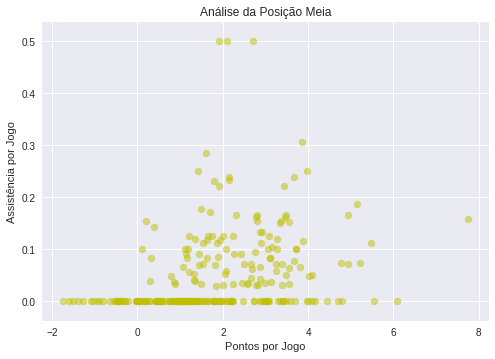

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

#read data
X = meia['ppg']
y = meia['Ag']

#visualize results
plt.scatter(X,y,c='y',alpha=0.5)
plt.title("Análise da Posição Meia")
plt.xlabel('Pontos por Jogo')
plt.ylabel('Assistência por Jogo')
plt.show()

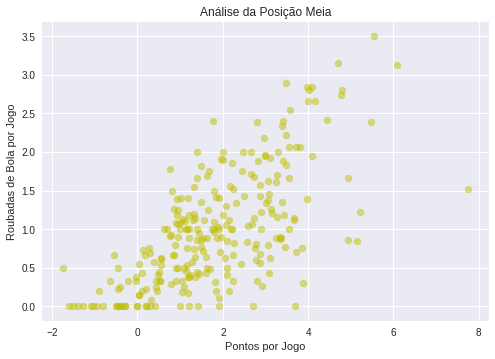

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

#read data
X = meia['ppg']
y = meia['RBg']

#visualize results
plt.scatter(X,y,c='y',alpha=0.5)
plt.title("Análise da Posição Meia")
plt.xlabel('Pontos por Jogo')
plt.ylabel('Roubadas de Bola por Jogo')
plt.show()

## 1.10 Clustering os Jogadores da Posição Meia

Escolhemos os indicadores de desempenho **RBg**  (Roubadas de Bola por Jogo) e **ppg** (Pontos por Jogo) para analisar, pois achamos que são  características importantes dos jogadores da posição Meia.

Analisando o gráfico acima  **Pontos por Jogo x Roubadas de Bola por Jogo** parece existir 4 regiões gerais, ou clusters, nas quais os jogadores da posição Meia se encaixam (com alguns outliers, é claro!). Podemos usar uma técnica chamada clustering para segmentar todos os jogadores Meia em grupos de jogadores similares, de acordo com essas características. 

Existem várias maneiras de armazenar em cluster os dados, mas aqui vamos nos concentrar nos clusters baseados em centróides. O armazenamento em cluster baseado no Centróide  funciona bem quando os clusters se parecem com círculos com centros (ou centróides). O centróide representa a média aritmética de todos os pontos de dados nesse cluster.

O **K-Means Clustering** é um algoritmo de cluster baseado em centróides. O K em K-Means refere-se ao número de clusters nos quais queremos segmentar nossos dados. No K-Means temos que especificar o que é k. Vamos definir **k para 4**, pois queremos que o K-Means segmente nossos dados em 4 clusters.








## 1.11 O Algoritmo

O**K-Means** é um algoritmo iterativo que alterna entre recalcular o centroide de cada cluster e os jogadores da posição Meia que pertencem a esse cluster. 

**Passo 1** (Atribuir Pontos aos Clusters) - para cada jogador, calcule a distância Euclideana entre as coordenadas daquele jogador (valores para ppg & RBg) e cada uma das coordenadas dos centróides. Atribua o jogador ao cluster cujo centróide é o mais próximo (tenha a menor distância Euclidiana) da sua coordenada.

**Passo 2** (Atualizar Novos Centróides dos Clusters) - para cada cluster, calcule o novo centróide, calculando a média aritmética de todos as coordenadas (valores para ppg & RBg de cada jogador) desse cluster. 

Repita os passos 1 e 2 até que os clusters não estejam mais em movimento e tenham convergido.


In [0]:
import  numpy as np 
num_clusters = 4

# Use numpy's random function to generate a list, 
# length: num_clusters, of indices
random_initial_points = np.random.choice(meia.index, size=num_clusters)

# Use the random indices to create the centroids
centroids = meia.loc[random_initial_points]

### 1.11.1 Visualize os centroids

Vamos plotar os centróides, além dos pontos por jogo x roubadas de bola por jogo (dos jogadores da posição Meia), para que possamos ver  a posição dos centróides iniciais (escolhidos aleatoriamente)

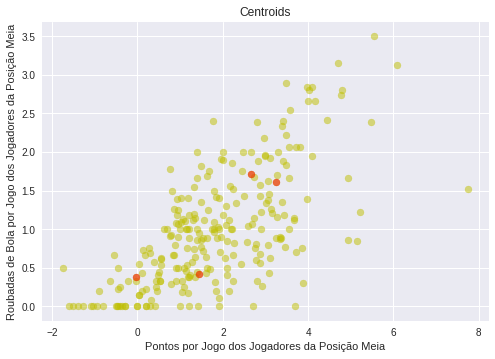

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

#read data
X = meia['ppg']
y = meia['RBg']
X1 = centroids['ppg']
y1= centroids['RBg']

#visualize results
plt.scatter(X,y,c='y',alpha=0.5)
plt.scatter(X1,y1,c='r',alpha=0.5)
plt.title("Centroids")
plt.xlabel('Pontos por Jogo dos Jogadores da Posição Meia')
plt.ylabel('Roubadas de Bola por Jogo dos Jogadores da Posição Meia')
plt.show()

Os centróides de cada cluster terá um cluster_id e uma lista com as coordenadas do centróide (valores para ppg e RBg), estruturados em um dicionário:

- key: **cluster_id** do cluster desse centróide
- value: coordenadas do centróide expressa como uma lista (**ppg** primeiro valor, **RBg** segundo valor)



A função **centroids_to_dict** recebe como parâmetro o dataframe **centroids**. A sua funcionalidade é criar um **cluster_id** e converter  **ppg** e **RBg** para esse centróide em uma lista de coordenadas e incluir o **cluster_id** e a **lista de coordenadas** no dicionário retornado.

In [0]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['RBg']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)
print("centroids_dict:", centroids_dict)

centroids_dict: {0: [3.2428571428571433, 1.6071428571428572], 1: [1.4482758620689657, 0.41379310344827586], 2: [-0.037500000000000006, 0.375], 3: [2.6607142857142856, 1.7142857142857142]}


### 1.11.2 Passo 1 - Distância Euclidiana

Antes de atribuirmos os jogadores aos clusters, precisamos de uma maneira de comparar os valores **ppg** e **RBg** dos jogadores com os centróides de cada cluster. 

A distância euclidiana é a técnica mais comum usada na ciência de dados para medir a distância entre vetores e funciona extremamente bem em 2 e 3 dimensões. 


A função **calculate_distance**, recebe como parâmetro  2 listas:
- os valores **ppg** e **RBg** e 
- os valores do centróide para **ppg** e **RBg**.

E retorna a distância entre esses dois pontos

In [0]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance


A função **assign_to_cluster** atribui aos jogadores um cluster com base na distância euclidiana. No dataframe **meia**  será adicionada uma coluna denominada **cluster** que contém o **cluster_id** do cluster ao qual o jogador pertence.





In [0]:
def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['ppg'], row['RBg']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

meia['cluster'] = meia.apply(lambda row: assign_to_cluster(row), axis=1)

In [0]:
meia.head()

,AtletaID,Pontos,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS,Posicao,Jogos,ppg,Ag,RBg,cluster
3,37607,32.2,11.0,40.0,2.0,0.0,3.0,12.0,0.0,3.0,0.0,19.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4,16.0,2.012500,0.125,1.187500,1
4,37608,9.6,2.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5.0,1.920000,0.000,1.400000,1
8,37652,0.9,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3.0,0.300000,0.000,0.000000,2
15,37674,37.3,17.0,38.0,0.0,1.0,3.0,4.0,2.0,3.0,0.0,17.0,17.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,19.0,1.963158,0.000,0.894737,1
16,37688,-9.1,3.0,12.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,15.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,10.0,-0.910000,0.000,0.200000,2


### 1.11.3 Visualizando os Clusters

A função  **visualize_clusters** possibilita a visualização dos jogadores (x = **ppg** e Y = **RBg**) agrupados pelos seus cluster.

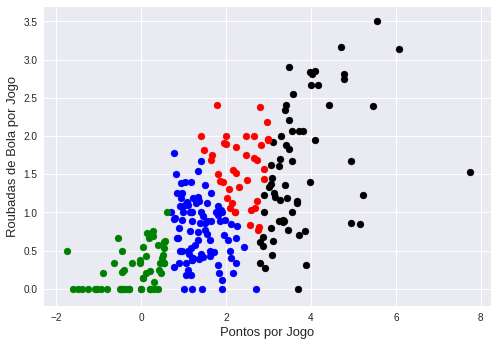

In [0]:
# Visualizing clusters
import matplotlib.pyplot as plt

def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['RBg'], c=colors[n-1])
        plt.xlabel('Pontos por Jogo', fontsize=13)
        plt.ylabel('Roubadas de Bola por Jogo', fontsize=13)
    plt.show()

visualize_clusters(meia, 4)

### 1.11.4 Passo 2 - Recalcular os Centróides para cada Cluster

A função **recalculate_centroids** recebe como parâmetro o dataframe dos jogadores. O seu objetivo é calcular o novo centróide de cada cluster, através do cálculo da nova média geométrica (envolvendo os dados **ppg** e **RBg**). Retorna um dicionário com os dados: cluster_id e o novo centróide.

In [0]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        # Calculate new centroid using mean of values in the cluster
        new_centroid = [np.average(values_in_cluster['ppg']), 
                        np.average(values_in_cluster['RBg'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict

centroids_dict = recalculate_centroids(meia)
print("centroids_dict:", centroids_dict)

centroids_dict: {0: [3.762848926908239, 1.5763264991229136], 1: [1.3919513178947056, 0.7658138054683482], 2: [-0.16859791443124778, 0.25858462525129194], 3: [2.3263168905700526, 1.5570694054922978]}


### 1.11.5 Repita o Passo 1 - Atribuição do Cluster

Já que recalculamos os centróides, vamos executar novamente o Passo 1 (**assign_to_cluster**) e ver a mudança que ocorreu com os clusters.

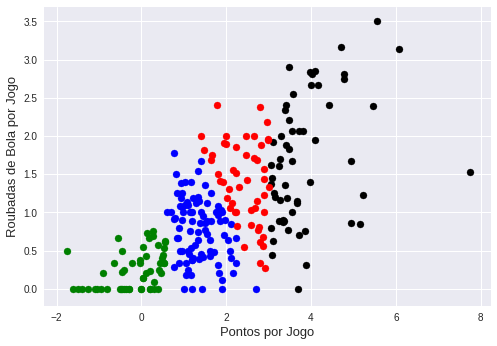

In [0]:
meia['cluster'] = meia.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(meia, num_clusters)


### 1.11.6 Repita o Passo 2 (Recalcular os  Centróides) e o Passo 1 (Atribuição dos Clusters) 

Agora precisamos recalcular os centróides e mudar os clusters novamente.

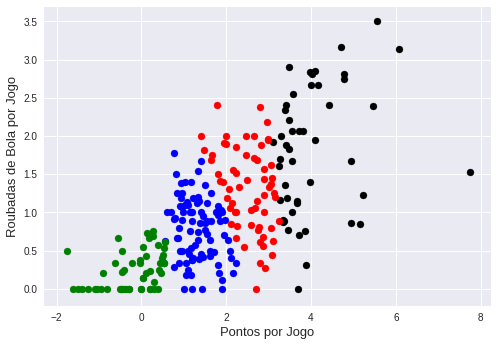

In [0]:
centroids_dict = recalculate_centroids(meia)
meia['cluster'] = meia.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(meia, num_clusters)

## 1.12 Desafios do K-Means

À medida que repetimos as etapas 1 e 2 e executamos a função **visualize_clusters**, constatamos que alguns dos pontos estão mudando de  clusters a cada iteração (especialmente em áreas onde dois clusters quase se sobrepõem), mas, na maioria das vezes, os clusters parecem não se alterar  após cada iteração. Isto significa duas coisas:

- K-Means não causa mudanças massivas na composição de clusters entre iterações, o que significa que ele sempre convergirá e se tornará estável;
- Como o K-Means é conservador entre as iterações,  a posição inicial escolhida para o centróides e a distribuição inicial dos jogadores nos clusters é um fator importante.

A implementação do K-Means do **sklearn** neutraliza esses problemas. 






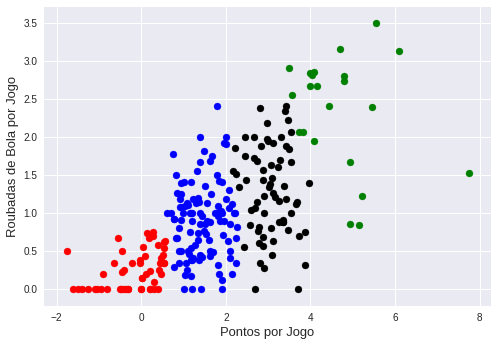

In [0]:
from sklearn.cluster import KMeans
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(meia[['ppg', 'RBg']])
meia['cluster'] = kmeans.labels_

visualize_clusters(meia, num_clusters)


## 1.13 Considerações Finais

Neste projeto, exploramos como segmentar jogadores do campeonato de Futebol Brasileirão (ano 2017) em grupos com características semelhantes. A nossa exploração ajudou-nos a ter uma ideia dos 4 tipos de jogadores meia, com base nos indicadores de performance **Roubadas de Bola por Jogo** e **Pontos por Jogo**. Analisando o gráfico acima, podemos afirmar que os melhores jogadores da posição meia, com relação a esses indicadores de performance, são os que pertencem ao cluster verde.

# 2.0 Árvore de Decisão

Árvores de decisão são uma poderosa e popular técnica de aprendizado de máquina supervisionada. O conceito básico é muito semelhante às árvores que  usamos para auxiliar na tomada de decisões.

 Primeiro, construímos a árvore com dados históricos e depois a usamos para prever um resultado. POdemos usar árvores de decisão para problemas de classificação ou regressão.
 
 Uma árvore de decisão é composta de uma série de nós e ramificações. Um nó é onde dividimos os dados com base em uma variável e uma ramificação é um dos lados da divisão.

## 2.1 Dataset 

Vamos utilizar em nossa análise um subconjunto do dataset do CartolaFC,  o dataframe** brasileirao2017**, que equivale aos dados do campeonato de 2017. Cada linha do dataframe representa o desempenho de um jogador em uma rodada do campeonato de 2017.

In [47]:
brasileirao2017 = rodadas[rodadas['ano'] == 2017].copy()
#dimensão do dataset a ser utilizado
brasileirao2017.shape

(9346, 72)

In [0]:
#Tipo dos dados
brasileirao2017.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9346 entries, 29 to 17346
Data columns (total 72 columns):
A                  9346 non-null float64
AtletaID           9346 non-null int64
CA                 9346 non-null float64
CV                 9346 non-null float64
ClubeID            9346 non-null int64
DD                 9346 non-null float64
DP                 9346 non-null float64
FC                 9346 non-null float64
FD                 9346 non-null float64
FF                 9346 non-null float64
FS                 9346 non-null float64
FT                 9346 non-null float64
G                  9346 non-null float64
GC                 9346 non-null float64
GS                 9346 non-null float64
I                  9346 non-null float64
Jogos              9346 non-null float64
PE                 9346 non-null float64
PP                 9346 non-null float64
Pontos             9346 non-null float64
PontosMedia        9346 non-null float64
Posicao            9346 non-null i

Como pode ser visto acima, todos os dados do dataframe a ser utilizado só possui dados numéricos.

In [0]:
#informações estatísticas dos nossos dados
brasileirao2017.describe()

,A,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,home.attack,home.defend,home.score.x,pred.away.score,pred.home.score,risk_points,variable
count,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.0,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000,9346.000000
mean,0.060882,72953.993259,0.174085,0.007490,12.597689,0.102504,0.002782,1.150867,0.237749,0.342927,1.082816,0.017441,0.088059,0.002033,0.075754,0.123582,12.307297,2.207896,0.004066,2.933094,2.938345,3.571902,7.438580,-0.001914,1.069013,20.668521,0.112562,2017.0,0.036197,0.058421,0.087007,0.013567,0.054188,0.094693,0.001009,0.011363,0.630262,0.870469,0.137232,0.194072,0.194876,0.273636,0.616189,0.844254,0.010550,0.023069,0.052294,0.080890,0.000932,0.010400,0.044467,0.073165,0.077312,0.104473,1.311220,1.720437,0.001432,0.012369,1.601801,0.551675,0.829146,0.067032,0.097796,2.347216,1.064627,0.013618,-0.007678,1.361010,0.034433,0.034484,3.178367,1.502247
std,0.253464,18168.753946,0.379203,0.086224,6.966090,0.536301,0.054667,1.245614,0.536892,0.635992,1.292109,0.133343,0.312830,0.045045,0.402555,0.402542,8.099643,1.955991,0.065298,4.315474,2.035088,1.186430,4.318102,1.067342,1.278061,10.241227,0.316073,0.0,0.044516,0.143853,0.066098,0.099458,0.236938,0.390272,0.005720,0.098024,0.429689,0.701284,0.146790,0.281042,0.170492,0.328416,0.493102,0.783004,0.022896,0.108448,0.072685,0.173531,0.004877,0.096614,0.194705,0.301693,0.118544,0.217164,0.873072,1.290504,0.005636,0.098621,1.067253,0.454475,0.777285,0.103593,0.189814,2.132499,1.025568,0.083794,0.052911,1.098564,0.208190,0.204910,1.746954,0.500022
min,0.000000,36540.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-10.000000,-6.700000,1.000000,0.740000,-5.540000,0.000000,1.000000,0.000000,2017.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.950000,0.000000,0.000000,0.000000,0.000000,-3.460000,0.000000,0.000000,-0.479319,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,62974.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,1.610000,3.000000,4.140000,-0.630000,0.000000,12.000000,0.000000,2017.0,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.330189,0.400000,0.028571,0.000000,0.058824,0.000000,0.244898,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.627565,0.600000,0.000000,0.000000,0.816151,0.206897,0.200000,0.000000,0.000000,0.700000,0.000000,0.000000,0.

In [48]:
#Cálculo do preço médio dos jogadores em todo o campeonato  de 2017 no CartolaFC
mediapreco = brasileirao2017['Preco'].mean()
print('Preço Médio dos Jogadores no Campeonato Brasileirão 2017:', mediapreco)

Preço Médio dos Jogadores no Campeonato Brasileirão 2017: 7.438580141236893


Criação do campo, **Preco_Mean_Camp**, que diz que se o valor do jogador nesta rodada é maior do que o  Preço Médio de todos os jogadores no campeonato. 

 **Preco_Mean_Camp** será o campo que utilizaremos para o algoritmo prever. 

Neste campo será armazenado os seguintes valores:

- 0: indicando que o preço do jogador nesta rodada é menor ou igual ao preço médio de jogador de todo o campeonato
- 1: indicando que o preço do jogador nesta rodada é maior do que o preço médio de jogador de todo o campeonato

In [0]:
import numpy as np
brasileirao2017['Preco_Mean_Camp'] = np.where(brasileirao2017['Preco'] > mediapreco, 1, 0)

In [0]:
brasileirao2017.head(15)

,A,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,...,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,home.attack,home.defend,home.score.x,pred.away.score,pred.home.score,risk_points,variable,Preco_Mean_Camp
29,0.0,36540,1.0,0.0,13,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.5,7.50,2,6.11,1.11,2.0,4,1.0,2017,0.008333,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,...,0.4,0.066667,0.2,0.175000,0.4,0.200000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.008333,0.0,0.533333,0.2,0.0,0.0,1.241667,0.375000,0.4,0.166667,0.2,1.50,0.0,0.0,0.0,0.0,0.0,0.0,2.773305,1,0
30,0.0,36540,1.0,0.0,13,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.6,5.05,2,5.64,-0.47,2.0,5,0.0,2017,0.008264,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,...,0.4,0.074380,0.4,0.173554,0.4,0.206612,0.2,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.008264,0.0,0.537190,0.4,0.0,0.0,1.252893,0.388430,0.8,0.165289,0.2,2.02,0.0,0.0,0.0,2.0,0.0,0.0,2.688680,2,0
31,1.0,36540,0.0,0.0,13,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,10.4,6.83,2,7.76,2.12,3.0,6,0.0,2017,0.016393,0.2,0.090164,0.0,0.0,0.0,0.0,0.0,...,0.4,0.073770,0.4,0.180328,0.6,0.213115,0.4,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.008197,0.0,0.557377,1.0,0.0,0.0,1.327869,0.409836,1.4,0.163934,0.2,4.10,1.0,0.0,0.0,1.0,0.0,0.0,3.676593,2,1
32,0.0,36540,0.0,0.0,13,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.2,5.17,2,6.25,-1.51,0.0,8,0.0,2017,0.016129,0.2,0.088710,0.0,0.0,0.0,0.0,0.0,...,0.6,0.072581,0.4,0.177419,0.6,0.225806,0.8,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.008065,0.0,0.556452,1.2,0.0,0.0,1.308065,0.403226,1.4,0.161290,0.2,4.14,2.0,0.0,0.0,2.0,0.0,0.0,3.710705,2,0
33,0.0,36540,1.0,0.0,13,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,-0.8,3.98,2,5.92,-0.33,1.0,9,0.0,2017,0.016000,0.2,0.096000,0.0,0.0,0.0,0.0,0.0,...,0.4,0.072000,0.2,0.176000,0.2,0.224000,0.8,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.008000,0.0,0.552000,1.0,0.0,0.0,1.291200,0.408000,1.2,0.160000,0.0,2.48,1.0,0.0,0.0,5.0,0.0,0.0,3.833319,1,0
34,0.0,36540,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,4.0,3.98,2,6.29,0.37,1.0,16,0.0,2017,0.015152,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,...,0.0,0.068182,0.0,0.166667,0.0,0.212121,0.0,0.007576,0.2,0.00000,0.0,0.0,0.0,0.0,0.0,0.007576,0.0,0.553030,0.8,0.0,0.0,1.253030,0.393939,0.2,0.151515,0.0,0.80,1.0,0.0,0.0,2.0,0.0,0.0,1.313350,1,0
35,1.0,36540,0.0,0.0,13,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,5.9,4.25,2,6.68,0.39,0.0,17,0.0,2017,0.022556,0.2,0.090226,0.0,0.0,0.0,0.0,0.0,...,0.2,0.075188,0.2,0.172932,0.2,0.210526,0.0,0.007519,0.2,0.00000,0.0,0.0,0.0,0.0,0.0,0.007519,0.0,0.556391,1.0,0.0,0.0,1.287970,0.390977,0.2,0.150376,0.0,1.98,1.0,0.0,0.0,1.0,0.0,0.0,2.181768,2,0
36,0.0,36540,0.0,0.0,13,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,4.1,4.23,2,6.65,-0.03,2.0,18,0.0,2017,0.022388,0.2,0.089552,0.0,0.0,0.0,0.0,0.0,...,0.4,0.074627,0.2,0.179104,0.4,0.216418,0.2,0.007463,0.2,0.00000,0.0,0.0,0.0,0.0,0.0,0.007463,0.0,0.552239,1.0,0.0,0.0,1.308955,0.402985,0.6,0.149254,0.0,2.80,2.0,0.0,0.0,3.0,0.0,0.0,2.376646,2,0
37,0.0,36540,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,6.4,4.47,2,7.02,0.37,1.0,22,1.0,2017,0.021739,0.0,0.086957,0.0,0.0,0.0,0.0,0.0,...,0.2,0.072464,0.0,0.173913,0.2,0.210145,0.2,0.007246,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.007246,0.0,0.543478,0.2,0.0,0.0,1.317391,0.398551,0.6,0.152174,0.2,2.10,0.0,0.0,0.0,2.0,0.0,0.0,2.727718,1,0
38,0.0,36540,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0,0.0,2.8,4.30,2,6.53,-0.49,2.0,27,0.0,2017,0.020979,0.0,0.083916,0.0,0.0,0.0,0.0,0.0,...,0.0,0.069930,0.0,0.167832,0.0,0.202797,0.

## 2.2 Entropia dos Dados

Usaremos entropia para descobrir em quais variáveis devemos dividir nós. Após a divisão, teremos dois conjuntos de dados, cada um contendo as linhas de uma ramificação da divisão.

Temos que alcançar as folhas tendo apenas 1s ou apenas 0s em **Preco_Mean_Camp**, cada divisão precisará nos aproximar desse objetivo.

**Entropia** refere-se a desordem de um conjunto de dados.Quanto mais "misturados" 1s e 0s (no nosso contexto,) forem, maior será a entropia. Um conjunto de dados consistindo, apenas, de 1s na coluna **Preco_Mean_Camp** tem uma baixa entropia.


Cálculo da entropia da coluna **Preco_Mean_Camp** . O resultado será atribuído a variável **Preco_Mean_Camp_entropy**

In [52]:
tot_linhas = brasileirao2017.shape[0]
print('Total de Linhas:', tot_linhas)

Total de Linhas: 9346


In [64]:
#cálculo da entropia
import math

qtde_0 = brasileirao2017[brasileirao2017["Preco_Mean_Camp"]==0].shape[0]
prob_0 = qtde_0/tot_linhas
print('Probabilidade de 0:', prob_0)

qtde_1 = brasileirao2017[brasileirao2017["Preco_Mean_Camp"] == 1].shape[0]
prob_1 = qtde_1/tot_linhas
print('Probabilidade de 1:', prob_1)

Preco_Mean_Camp_entropy = -(prob_0 * math.log(prob_0,2) + prob_1 * math.log(prob_1,2))
print('Preco_Mean_Camp_entropy:', Preco_Mean_Camp_entropy)

Probabilidade de 0: 0.5471859619088381
Probabilidade de 1: 0.452814038091162
Preco_Mean_Camp_entropy: 0.9935660656019761


A função **calc_entropy**, recebe como parâmetro uma coluna do dataframe e retorna a entropia desta coluna.

In [0]:
import numpy

def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = numpy.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            entropy += prob * math.log(prob, 2)
    
    return -entropy

In [63]:
# Verify that our function matches our answer from earlier
brasileirao2017_entropy = calc_entropy(brasileirao2017["Preco_Mean_Camp"])
print('Entropia da coluna Preco_Mean_Camp:', brasileirao2017_entropy)

Entropia da coluna Preco_Mean_Camp: 0.9935660656019761


## 2.3 Ganho da Informação 


O ganho de informação nos diz qual divisão reduzirá mais a entropia. Vamos testar a coluna **Pontos**, pois o preço do jogador depende da sua pontuação.

- Calcule o **ganho da informação** para dividir a coluna  **Pontos**  do dataset  **brasileirao2017** em dois ramos: esquerdo e direito.
 

In [65]:
median_Pontos = brasileirao2017["Pontos"].median()
print('Mediana de Pontos:', median_Pontos)

left_split = brasileirao2017[brasileirao2017["Pontos"] <= median_Pontos]
qtde_left = left_split.shape[0]
print('Quantidade de tuplas do Ramo Esquerdo:', qtde_left)

right_split = brasileirao2017[brasileirao2017["Pontos"] > median_Pontos]
qtde_right = right_split.shape[0]
print('Quantidade de tuplas do Ramo Direito:', qtde_right)

Pontos_information_gain = brasileirao2017_entropy - (((qtde_left / tot_linhas) * calc_entropy(left_split["Preco_Mean_Camp"])) + ((qtde_right / tot_linhas) * calc_entropy(right_split["Preco_Mean_Camp"])))
print('Pontos_information_gain:', Pontos_information_gain)

Mediana de Pontos: 1.9
Quantidade de tuplas do Ramo Esquerdo: 4687
Quantidade de tuplas do Ramo Direito: 4659
Pontos_information_gain: 0.0378389959277553


A função **calc_information_gain** recebe como parâmetro: o dataframe, a coluna a ser dividida e a coluna target e calcula o ganho de informação da coluna passada.

In [0]:
def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    # Find the median of the column we're splitting
    column = data[split_name]
    median = column.median()
    
    # Make two subsets of the data, based on the median
    left_split = data[column <= median]
    right_split = data[column > median]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

In [0]:
print('Pontos_information_gain:', calc_information_gain(brasileirao2017, "Pontos", "Preco_Mean_Camp"))

Pontos_information_gain: 0.0378389959277553


## 2.4 Encontrando a Melhor Divisão

Vamos determinar a melhor variável para dividir um nó. Quando começamos a nossa árvore, queremos fazer uma divisão inicial. Vamos calcular o ganho de informação para várias variáveis e identificar qual é a melhor (a que tem o maior valor).



In [0]:
#lista de colunas que iremos calcular o ganho de informação
columns = ["Pontos", "FS", "PE", "A", "FT", "FD", "FF", "G", "I", "PP", "RB", "FC", "GC", "CA", "CV", "SG", "DD", "DP", "GS"]
information_gains = []

# Calculando o ganho de informação para cada coluna
for col in columns:
    information_gain = calc_information_gain(brasileirao2017, col, "Preco_Mean_Camp")
    information_gains.append(information_gain)
    
#Encontrando o maior valor na lista, e identificando qual coluna possui este ganho de informação
highest_gain_index = information_gains.index(max(information_gains))
highest_gain = columns[highest_gain_index]
print("Variável com Maior Ganho de Informação:", highest_gain)

Variável com Maior Ganho de Informação: Pontos


# 3.0 Aplicando Árvores de Decisão

O dataset a ser utilizado será os dados  do Jogo Virtual Cartola do ano de 2017. O objetivo é prever o preço do jogador em cada rodada. O dataset possui várias informações sobre o jogador em cada rodada: faltas sofridas, passes errados, assistências, gols, entre outras. A coluna target **Preco_Mean_Camp**  indica, para cada rodada, se o preço do jogador é menor ou igual ao preço médio de jogador  do campeonato em 2017 (0), ou maior do que o preço médio de jogador do campeonato em 2017 (1).

## 3.1 Using Decision Trees With scikit-learn

Usamos a classe [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)  para problemas de classificação, já que queremos prever um resultado binário (preço do jogador na rodada, maior ou menor igual ao preço médio).

O primeiro passo é treinar o classificador sobre os dados.

In [67]:
from sklearn.tree import DecisionTreeClassifier

# A list of columns to train with.
columns = ["Pontos", "FS", "PE", "A", "FT", "FD", "FF", "G", "I", "PP", "RB", "FC", "GC", "CA", "CV", "SG", "DD", "DP", "GS"]

# Instantiate the classifier.
# Set random_state to 1 to keep results consistent.
clf = DecisionTreeClassifier(random_state=1)

# #fit using features and target.
clf.fit(brasileirao2017[columns], brasileirao2017["Preco_Mean_Camp"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

## 3.2 Dividindo o Dataset em Dados de Treino e Dados de Teste

Dividiremos a base de dados em dois conjuntos: o conjunto de treino e teste. 80% das linhas do dataset constituirão o conjunto de treino e o restante o conjunto de teste.


In [0]:
import numpy
import math

# Set a random seed so the shuffle is the same every time.
numpy.random.seed(1)

# Shuffle the rows.  This first permutes the index randomly using numpy.random.permutation.
# Then, it reindexes the dataframe with this.
# The net effect is to put the rows into random order.
brasileirao2017 = brasileirao2017.reindex(numpy.random.permutation(brasileirao2017.index))

train_max_row = math.floor(brasileirao2017.shape[0] * .8)
train = brasileirao2017.iloc[:train_max_row]
test = brasileirao2017[train_max_row:]

## 3.3 Avaliando o Erro com AUC

Para avaliar o erro de classificação, utilizaremos  [AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_curve). AUC é ideal para classificação binária. Quanto maior o AUC, mais acurada é a nossa predição.

Utilizaremos a função [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) do **sklearn.metrics**. 

Vamos calcular o  AUC entre **predictions** e a coluna **Preco_Mean_Camp** do conjunto de teste (**test**), e atribuir o resultado a variável **error**.


In [69]:
from sklearn.metrics import roc_auc_score

clf = DecisionTreeClassifier(random_state=1)
clf.fit(train[columns], train["Preco_Mean_Camp"])

predictions = clf.predict(test[columns])
print("predictions:", predictions)

error = roc_auc_score(predictions, test["Preco_Mean_Camp"])
print("roc_auc_test:", error)

predictions: [0 0 1 ... 0 0 0]
roc_auc_test: 0.5700567677311863


## 3.4. Calculando o Erro sobre o Conjunto de Treino 

A AUC para as predições sobre o conjunto de Teste deu  **.5701**. Vamos calcular o AUC para as predições sobre o conjunto de Treino (**train**). Desta forma, verificaremos se está ocorrendo overfitting no modelo.

É normal que o modelo treine melhor o conjunto de treino do que o conjunto de teste. No entanto, se a AUC sobre o conjunto de treino  for significativamente mais alto do que a AUC sobre o conjunto de testes, isso é um sinal de que o modelo pode estar overfitting.

In [0]:
predictions = clf.predict(train[columns])
roc_auc = roc_auc_score(predictions, train["Preco_Mean_Camp"])

print("roc_auc_train:", roc_auc)

roc_auc_train: 0.8780244587102878


## 3.5 Overfitting em Árvores de Decisão

Nossa AUC sobre o conjunto de treino foi **.878**, e a AUC sobre o conjunto de teste foi **.570**. 

Nosso modelo está predizendo melhor sobre o conjunto de treino do que sobre o conjunto de teste.

Baseado na AUC,  parece que o overfitting está ocorrendo em nosso modelo.

## 3.6 Reduzindo o Overfitting com uma Árvore com Pouca Profundidade

Existem várias maneiras de combater o overfitting, uma delas é restringir a profundidade da árvore quando ela está sendo construída.

Restringiremos a profundidade da árvore, adicionando o parâmetro **min_samples_split** (setando com o valor 13) quando criarmos a instância da classe **DecisionTreeClassifier**

Vamos realizar as predições sobre o conjunto de treino e de teste e calcular a AUC.

In [0]:
clf = DecisionTreeClassifier(min_samples_split=13, random_state=1)
clf.fit(train[columns], train["Preco_Mean_Camp"])
predictions = clf.predict(test[columns])
test_auc = roc_auc_score(predictions, test["Preco_Mean_Camp"])

train_predictions = clf.predict(train[columns])
train_auc = roc_auc_score(train_predictions, train["Preco_Mean_Camp"])

print("test_auc:", test_auc)
print("train_auc:", train_auc)

test_auc: 0.5892594056121454
train_auc: 0.7900519294327325


Agora, vamos setar **min_samples_split** com 25 e **max_depth** com  4 quando criarmos  a instância de DecisionTreeClassifier. E vamos realizar as predições sobre os dois conjuntos e calcular a AUC.

In [0]:
clf = DecisionTreeClassifier(random_state=1, min_samples_split=25, max_depth=4)
clf.fit(train[columns], train["Preco_Mean_Camp"])
predictions = clf.predict(test[columns])
test_auc = roc_auc_score(predictions, test["Preco_Mean_Camp"])

train_predictions = clf.predict(train[columns])
train_auc = roc_auc_score(train_predictions, train["Preco_Mean_Camp"])

print("test_auc:", test_auc)
print("train_auc:", train_auc)

test_auc: 0.6351640427492012
train_auc: 0.6472191725413151


## 3.7 Ajustando os Parâmetros para Melhorar a AUC

Definindo **min_samples_split** como **13**, conseguimos aumentar a AUC do conjunto de  teste de **.570** para **.589**.

Definindo  **min_samples_split** como **25** e **max_depth** como **4**, conseguimos aumentar a AUC do conjunto de teste de **.589** para **.635**, porém a AUC do conjunto de treino diminuiu de **.790** para **.647**. Isto mostra que este último modelo que construímos foi menos adaptável ao conjunto de treino do que o anterior, porém não temos mais overfitting.

| settings              | train AUC | test AUC |
|-----------------------|-----------|----------|
| default               | 0.878     | 0.570    |
| min_samples_split: 13 | 0.790     | 0.589    |
|min_samples_split: 25  | 0.647     |0.635     |





## 3.8 Ajustando a Profundidade da Árvore para Ajustar a AUC

Nós não temos mais overfitting, pois ambos os valores de AUC são muito próximos. Vamos alterar outros parâmetros do modelo e ver o que acontece!

- Vamos setar **max_depth** com 2 e **min_samples_split** com 100 quando criarmos a instância de **DecisionTreeClassifier**.
Vamos realizar as predições sobre o conjunto de treino e sobre o conjunto de teste e calcular a AUC.

In [0]:
clf = DecisionTreeClassifier(random_state=1, min_samples_split=100, max_depth=2)
clf.fit(train[columns], train["Preco_Mean_Camp"])
predictions = clf.predict(test[columns])
test_auc = roc_auc_score(predictions, test["Preco_Mean_Camp"])

train_predictions = clf.predict(train[columns])
train_auc = roc_auc_score(train_predictions, train["Preco_Mean_Camp"])

print("test_auc:", test_auc)
print("train_auc:", train_auc)

test_auc: 0.622788196651833
train_auc: 0.6235966173908977


## 3.9 Underfitting em Árvores Simplistas


Nossa precisão caiu na última aprendizagem, em relação à anterior:

| settings                                        | train AUC | test AUC |
|--------------------------------------------------|-----------|---------|
| default (min_samples_split: 2, max_depth: None) |          0.878     | 0.570    |
| min_samples_split: 13 | 0.790     | 0.589    |
|min_samples_split: 25, max_depth:4  | 0.647     |0.635     |
| min_samples_split: 100, max_depth: 2| 0.624   |0.623

Agora temos um  **underfitting**. **Underfitting** é o que ocorre quando nosso modelo é simples demais para explicar os relacionamentos entre as variáveis.

Geralmente, árvores de decisão sofrem de alta variância. A estrutura da árvore de decisão pode ser alterada se realizarmos uma pequena alteração no seu conjunto de dados de treino.

Se restringirmos demais  a profundidade da árvore, acabamos com o **overfitting**, mas geramos um **underfitting**. 

Para atingirmos a situação ideal, é necessário usarmos nossa intuição e ir ajustando, manualmente, os parâmetros do modelo.

Vamos introduzir ruído nos dados (adicionaremos uma coluna de valores aleatórios) e vamos ver o que acontece com o nosso modelo.

In [0]:
numpy.random.seed(1)

# Generate a column containing random numbers from 0 to 4
brasileirao2017["noise"] = numpy.random.randint(4, size=brasileirao2017.shape[0])

# Adjust "columns" to include the noise column
columns = ["noise", "Pontos", "FS", "PE", "A", "FT", "FD", "FF", "G", "I", "PP", "RB", "FC", "GC", "CA", "CV", "SG", "DD", "DP", "GS"]

# Make new train and test sets
train_max_row = math.floor(brasileirao2017.shape[0] * .8)
train = brasileirao2017.iloc[:train_max_row]
test = brasileirao2017.iloc[train_max_row:]

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train[columns], train["Preco_Mean_Camp"])

train_predictions = clf.predict(train[columns])
train_auc = roc_auc_score(train_predictions, train["Preco_Mean_Camp"])

test_predictions = clf.predict(test[columns])
test_auc = roc_auc_score(test_predictions, test["Preco_Mean_Camp"])

print("test_auc:", test_auc)
print("train_auc:", train_auc)

test_auc: 0.5626796566833181
train_auc: 0.9240901469275494


Como uma árvore de decisão é um modelo com alta variância, constatamos com os resultados obtidos acima que o modelo foi  sensível às alterações que realizamos nos dados de entrada.

A coluna de ruído  causou um **overfitting** significativo. A acurácia do nosso conjunto de testes diminui para .563, e a acurácia do nosso conjunto de treino aumentou para 0,924.

## 3.10 Considerações Finais

A principal desvantagem das árvores de decisão é a tendência de overfit.

A maneira de prevenir o overfitting que utilizamos aqui foi impedir que a árvore crescesse além de uma certa profundidade.

A maneira mais poderosa de reduzir o overfitting em árvores de decisão é criar conjuntos de árvores. Um algoritmo que faz isto é o **random forest**. Nas situações em que a acurácia da predição é o fator mais importante, **random forests** geralmente apresentam melhor desempenho.

As árvores de decisão são uma boa opção para tarefas em que é importante ser capaz de interpretar por que o algoritmo está fazendo o que ele está fazendo.
